In [942]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [943]:
df = pd.read_csv("train_dataset.csv")
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [944]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

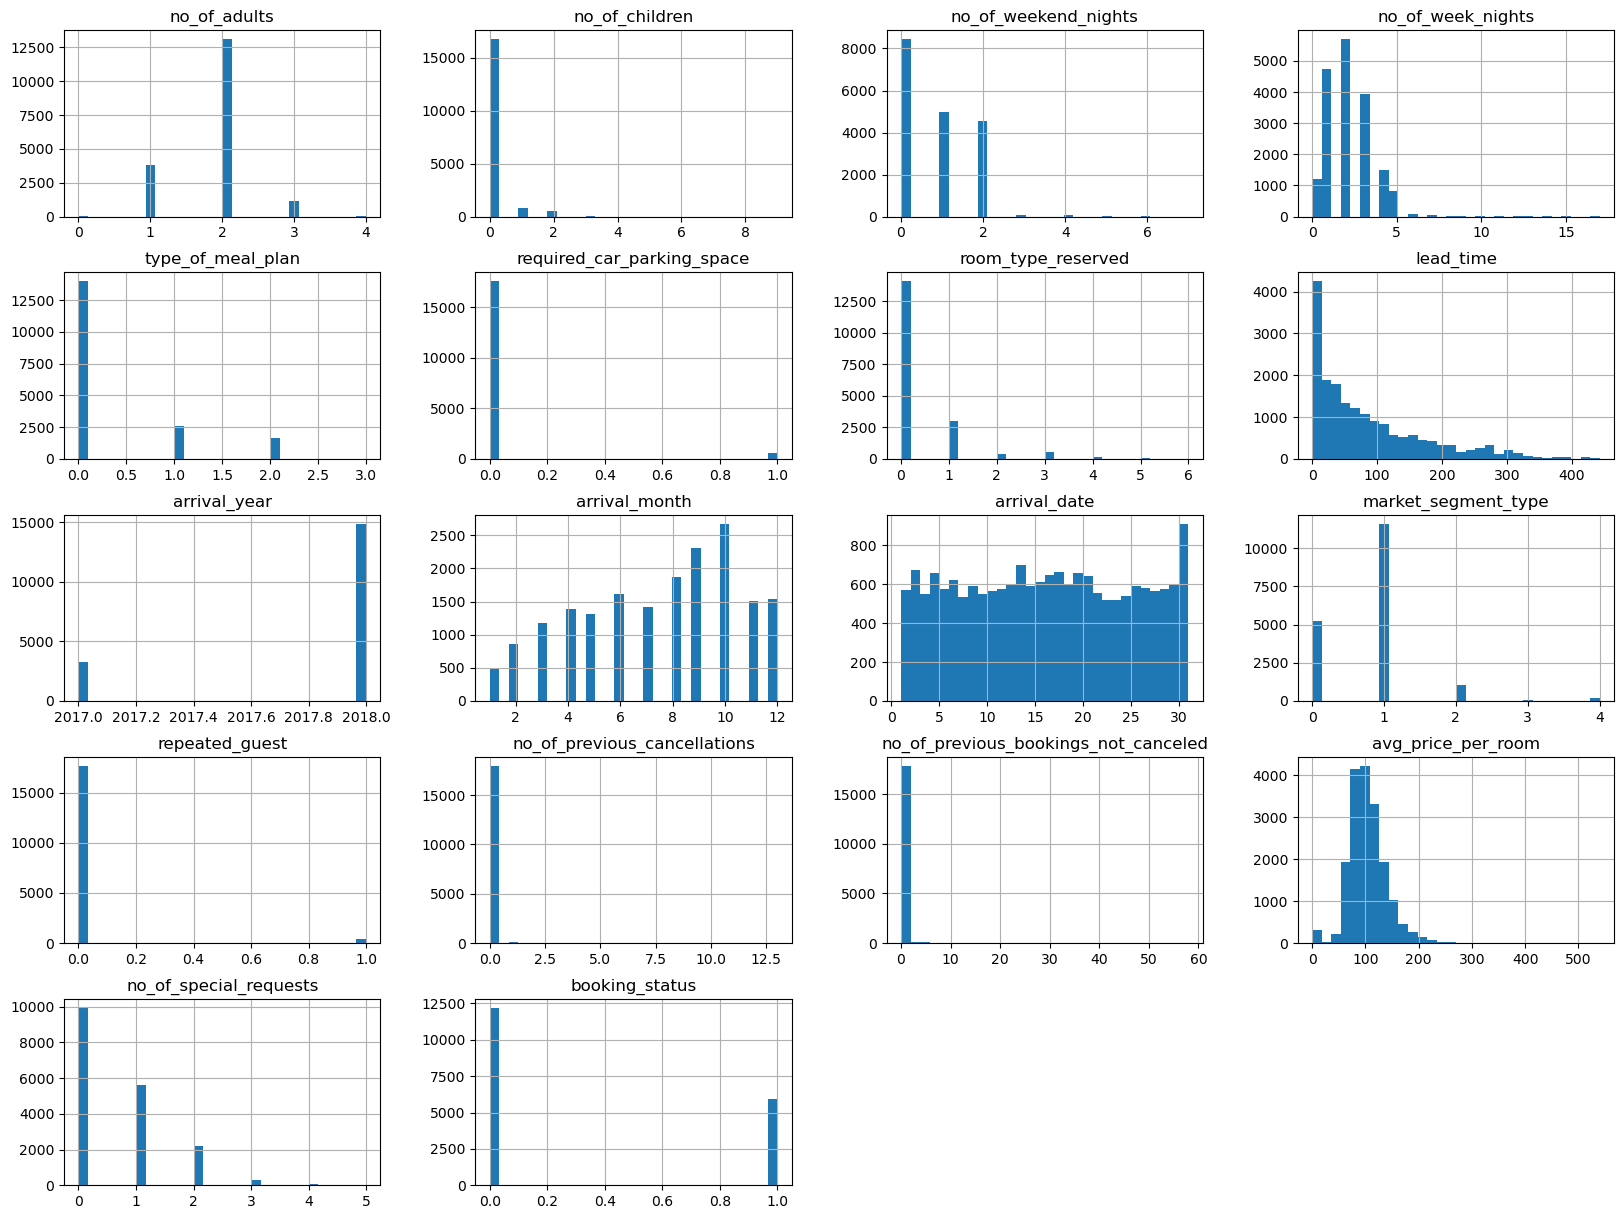

In [945]:
df.hist(bins=30, figsize=(20,15))
plt.show()

In [946]:
df = df[df["avg_price_per_room"] != 0].copy()

In [947]:
(df["lead_time"] == 0).sum()

np.int64(584)

In [948]:
anzahl = ((df["lead_time"] == 0) & (df["booking_status"] == 1)).sum()
print("lead_time=0 und storniert:", anzahl)

lead_time=0 und storniert: 33


In [949]:
#Bucketizing
df["n_lead_time"] = pd.cut(df["lead_time"],bins=[-0.5, 7, 30, 90, np.inf],labels=[0, 1, 2, 3]).astype(int)

In [950]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["booking_status"])   # Features
y = df["booking_status"]                  # Zielvariable

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, stratify=df["booking_status"], random_state=42)


In [951]:
corr_view = Xtrain.copy()

In [952]:
corr_view.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14282 entries, 6099 to 7239
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14282 non-null  int64  
 1   no_of_children                        14282 non-null  int64  
 2   no_of_weekend_nights                  14282 non-null  int64  
 3   no_of_week_nights                     14282 non-null  int64  
 4   type_of_meal_plan                     14282 non-null  int64  
 5   required_car_parking_space            14282 non-null  int64  
 6   room_type_reserved                    14282 non-null  int64  
 7   lead_time                             14282 non-null  int64  
 8   arrival_year                          14282 non-null  int64  
 9   arrival_month                         14282 non-null  int64  
 10  arrival_date                          14282 non-null  int64  
 11  market_segment_typ

In [953]:
def binarize_features(df, columns):
    df = df.copy()
    for col in columns:
        if col in df.columns:
            df["n_" + col] = (df[col] > 0).astype(int)
        else:
            print(f"{col} nicht gefunden")
    return df


In [ ]:
# Umwandlung Binär: 0 = kein Wochenende 1=Wochenende
#corr_view["n_is_weekend"] = (corr_view["no_of_weekend_nights"] > 0).astype(int)
#corr_view["n_was_cancelled"] = (corr_view["no_of_previous_cancellations"] > 0).astype(int)
#corr_view["n_is_familie"] = (corr_view["no_of_children"] > 0).astype(int)
#corr_view["n_room_type_bin"] = (corr_view["room_type_reserved"] != 0).astype(int) 

corr_view=binarize_features(corr_view, ["no_of_weekend_nights","no_of_previous_cancellations","no_of_children","room_type_reserved"])

In [ ]:

corr_view["n_cut_special_request"] = pd.cut(corr_view["no_of_special_requests"],  bins=[-0.5,0.5,1.5,np.inf], labels=[0,1,2]).astype(int)

# 0 | 1 | 2-4
corr_view["n_market_segment_bin"] = pd.cut(corr_view["market_segment_type"],bins=[-0.5, 0.5, 1.5, np.inf],labels=[0, 1, 2],include_lowest=True).astype(int)

# Winter, Frühling, Sommer, Herbst, Winter # 5 Intervalle → 5 Labels
corr_view["n_arrival_season"] = pd.cut(corr_view["arrival_month"],bins=[0,3,6,9,12],labels=[1, 2, 3, 4],include_lowest=True).astype(int)


#Entlastung avg_price_per_room
corr_view["n_avg_price_per_room"] = np.log10(corr_view["avg_price_per_room"])

# 0 = sehr kurzfristig, 1 = kurzfristig, 2 = mittelfristig, 3 = langfristig
#Bucketizing
#corr_view["n_lead_time"] = pd.cut(corr_view["lead_time"],bins=[-0.5, 7, 30, 90, np.inf],labels=[0, 1, 2, 3]).astype(int)


"""
corr_view = corr_view[["n_lead_time",
                       "n_is_weekend",
                       "n_room_type_bin",
                       "n_is_familie",
                       "n_arrival_season",
                       "n_market_segment_bin",
                       "n_was_cancelled",
                       "n_cut_special_request"]]
"""

'corr_view = corr_view[["n_lead_time",\n                       "n_is_weekend",\n                       "n_room_type_bin",\n                       "n_is_familie",\n                       "n_arrival_season",\n                       "n_market_segment_bin",\n                       "n_was_cancelled",\n                       "n_cut_special_request"]]\n'

In [956]:
corr_view["booking_status"] = ytrain
corr_matrix = corr_view.select_dtypes(include=["number"]).corr()
corr_matrix["booking_status"].sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.425968
n_lead_time                             0.360958
arrival_year                            0.178806
n_avg_price_per_room                    0.135950
avg_price_per_room                      0.123786
no_of_week_nights                       0.095746
no_of_adults                            0.087191
type_of_meal_plan                       0.076321
no_of_weekend_nights                    0.049710
n_no_of_weekend_nights                  0.039199
no_of_children                          0.030014
n_room_type_reserved                    0.028772
room_type_reserved                      0.026241
n_no_of_children                        0.024913
arrival_date                            0.010159
n_arrival_season                        0.006279
n_market_segment_bin                    0.000050
market_segment_type                    -0.002916
arrival_month                          -0.006066
no_of_previous_cance

In [957]:

corr_view = corr_view[["n_lead_time",
                       "n_avg_price_per_room",
                       "n_no_of_weekend_nights",
                       "n_room_type_reserved",
                       "n_no_of_children",
                       "n_arrival_season",
                       "n_market_segment_bin",
                       #"n_no_of_previous_cancellations",
                       "n_cut_special_request",
                       "booking_status"]]
                

In [958]:
corr_matrix = corr_view.select_dtypes(include=["number"]).corr()
corr_matrix["booking_status"].sort_values(ascending=False)

booking_status            1.000000
n_lead_time               0.360958
n_avg_price_per_room      0.135950
n_no_of_weekend_nights    0.039199
n_room_type_reserved      0.028772
n_no_of_children          0.024913
n_arrival_season          0.006279
n_market_segment_bin      0.000050
n_cut_special_request    -0.253527
Name: booking_status, dtype: float64

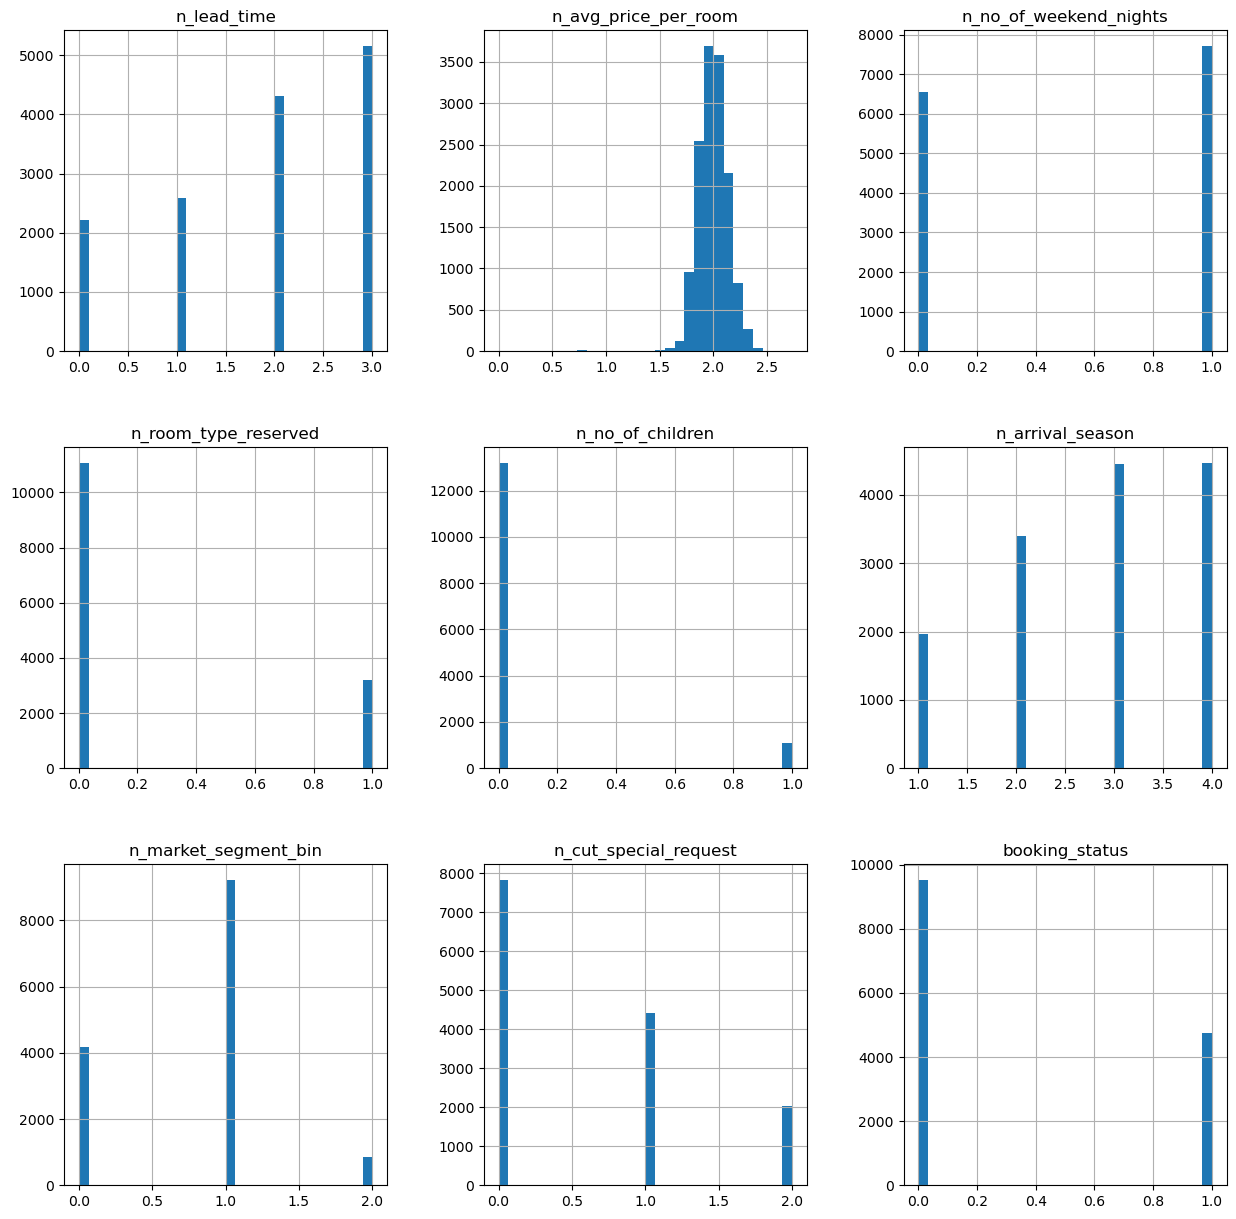

In [959]:
corr_view.hist(bins=30, figsize=(15,15))
plt.show()

In [960]:
corr_view["n_cut_special_request"]

6099     1
10601    0
13388    0
13645    2
13728    1
        ..
17791    2
8260     0
2874     0
7655     0
7239     0
Name: n_cut_special_request, Length: 14282, dtype: int64

Notiz:
lead_time hat die höchste Korrelation <br>
arrival_year wird vermutlich nur eine hohe Korrelation haben weil wir nur zwei Jahre haben, also ein bias - rausnehmen <br>
avg_price_per room würde ich drin lassen- evt gibt es noch eine kombi mit anderen Merkmalen die hilfreich wäre für eine besser Korrelation <br>
no of week nights würde ich noch drin lassen <br>
no of adulds auch und sonst nichts mehr das positiv korreliert

no of special requests sollte definitiv drin bleiben - ein binärmerkmal hat keine bessere korrelation ergeben aber könnte später für modelle evt besser sein zu verarbeiten z.B. Baum <br>
repeated guest hat auch eine hohe negative Korrelation aber der datensatz bietet nur wenige an die wiederholt haben, dass könnte dann auch eher ein bias StopIteration <br>
requiered car parking ist im Endefekt wie repeated guest - hat eine halbwegs hohe korrelation aber könnte auche ein Bias sein <br>



In [961]:
df = pd.read_csv("train_dataset.csv")

In [962]:
df = df[df["avg_price_per_room"] != 0].copy()
df = df[df["lead_time"] != 0].copy()

In [963]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1
18133,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0
18134,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1
18135,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0


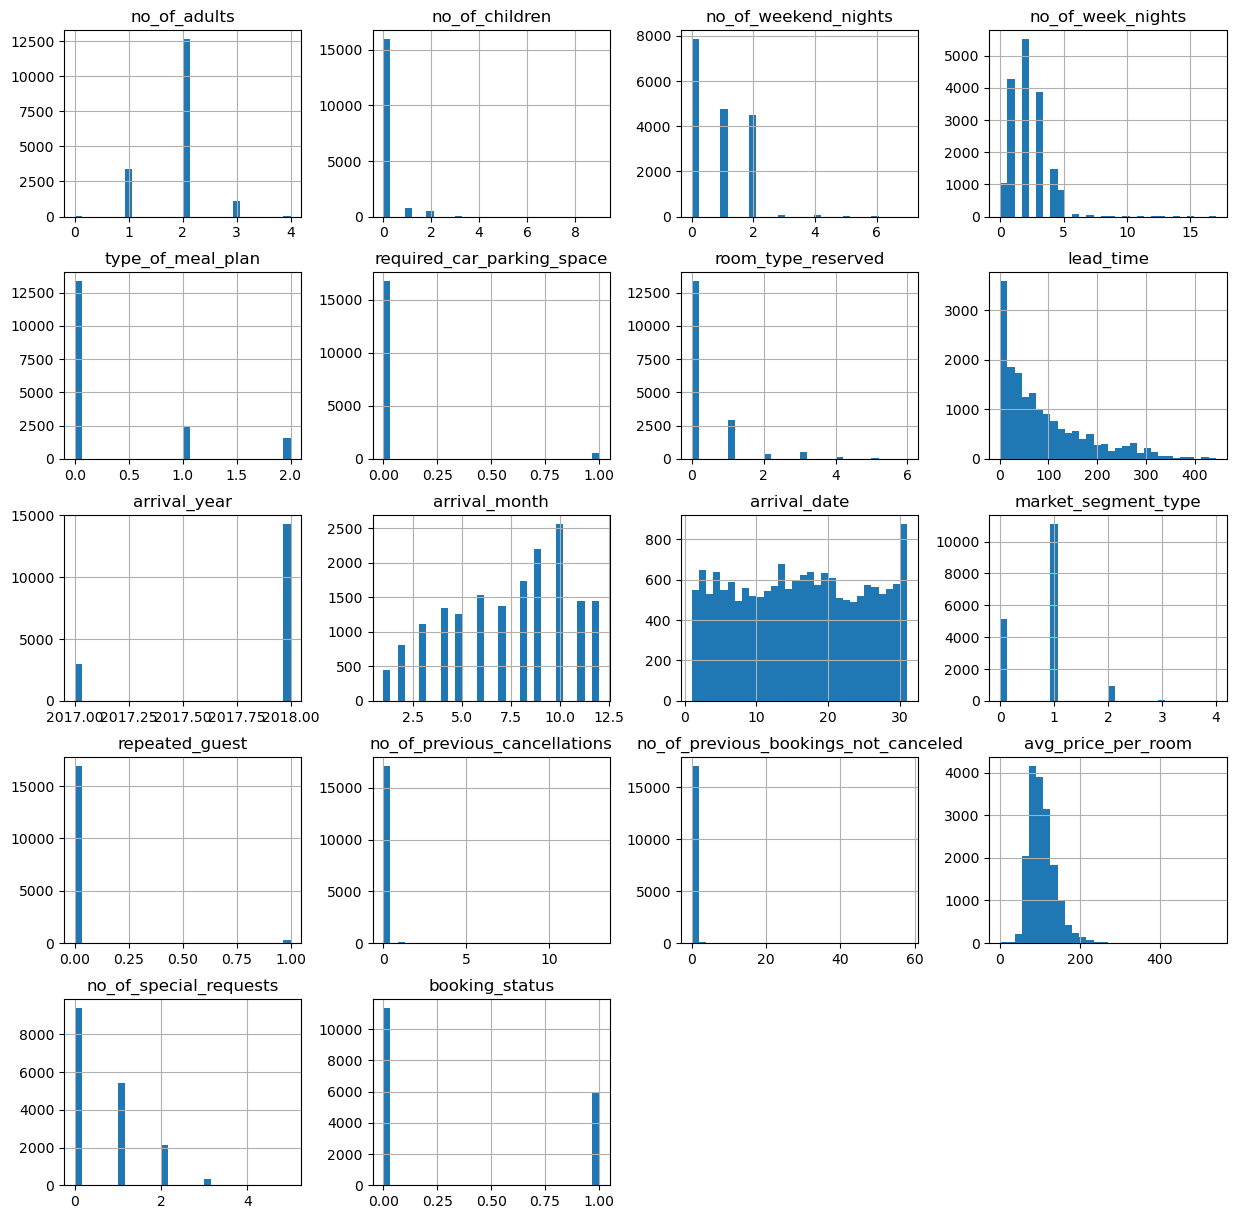

In [964]:
df.hist(bins=30, figsize=(15,15))
plt.show()

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17269 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          17269 non-null  int64  
 1   no_of_children                        17269 non-null  int64  
 2   no_of_weekend_nights                  17269 non-null  int64  
 3   no_of_week_nights                     17269 non-null  int64  
 4   type_of_meal_plan                     17269 non-null  int64  
 5   required_car_parking_space            17269 non-null  int64  
 6   room_type_reserved                    17269 non-null  int64  
 7   lead_time                             17269 non-null  int64  
 8   arrival_year                          17269 non-null  int64  
 9   arrival_month                         17269 non-null  int64  
 10  arrival_date                          17269 non-null  int64  
 11  market_segment_type 

In [966]:

def binarize_df(X):
    if isinstance(X, pd.DataFrame):
        return (X > 0).astype(int)
    return (X > 0).astype(int)


In [967]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, PowerTransformer


#transit_attribs = ["lead_time"]

# zu binäre Attribute 
bin_attribs = ["no_of_weekend_nights",
                "room_type_reserved",
                  "no_of_children",
                  #"required_car_parking_space",
                  #"type_of_meal_plan"
                  ]

# Kategorische Attribute (werden one-hot encodiert)
cat_attribs = [
    #"n_lead_time",
    "n_arrival_season",
    "n_market_segment_bin"]

# Numerische Attribute (werden skaliert)
log_scale_attribs = ["avg_price_per_room"]


# Box-Cox Transformation für lead_time
leadtime_pipeline = Pipeline([
    ("boxcox", PowerTransformer(method="box-cox", standardize=True))
])

# Numerische Attribute (werden skaliert)
#num_attribs = ["avg_price_per_room"]


# Pipelines 1
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Pipelines 2
bin_pipeline = Pipeline([
    ("bin", FunctionTransformer(binarize_df, validate=False, feature_names_out="one-to-one"))
])

log_scale_pipeline = Pipeline([
    ("log", FunctionTransformer(np.log1p, validate=False, feature_names_out="one-to-one")),
    ("scaler", StandardScaler())
])



# ColumnTransformer kombiniert alles
preprocess = ColumnTransformer([
    ("bin", bin_pipeline, bin_attribs,),
    ("cat", cat_pipeline, cat_attribs),
    ("log_scale", log_scale_pipeline, log_scale_attribs),
    ("leadtime", leadtime_pipeline, ["lead_time"])
    #("transit", "passthrough", transit_attribs)
 ])
  #("bin", "passthrough", bin_attribs,)

In [968]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1
18133,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0
18134,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1
18135,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0


In [969]:
df["n_cut_special_request"] = pd.cut(df["no_of_special_requests"],  bins=[-0.5,0.5,1.5,np.inf], labels=[0,1,2]).astype(int)

# 0 | 1 | 2-4
df["n_market_segment_bin"] = pd.cut(df["market_segment_type"],bins=[-0.5, 0.5, 1.5, np.inf],labels=[0, 1, 2],include_lowest=True).astype(int)

# Winter, Frühling, Sommer, Herbst, Winter # 5 Intervalle → 5 Labels
df["n_arrival_season"] = pd.cut(df["arrival_month"],bins=[0,3,6,9,12],labels=[1, 2, 3, 4],include_lowest=True).astype(int)

#Bucketizing
#df["n_lead_time"] = pd.cut(df["lead_time"],bins=[-0.5, 7, 30, 90, np.inf],labels=[0, 1, 2, 3]).astype(int)


hoteldata_prepared = pd.DataFrame(
    preprocess.fit_transform(df),
    index=df.index,
    columns=preprocess.get_feature_names_out()
)




In [970]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,n_cut_special_request,n_market_segment_bin,n_arrival_season
0,2,0,1,4,0,0,0,118,2017,12,...,1,0,0,0,110.80,2,0,2,1,4
1,2,1,0,2,0,0,0,17,2018,4,...,1,0,0,0,145.00,0,1,0,1,2
2,1,0,1,5,0,0,0,349,2018,10,...,0,0,0,0,96.67,0,1,0,0,4
3,1,0,2,4,0,0,0,69,2018,6,...,0,0,0,0,120.00,0,1,0,0,2
4,2,0,0,4,1,0,0,11,2018,1,...,1,0,0,0,69.50,1,0,1,1,1


In [971]:
hoteldata_prepared.head()

,bin__no_of_weekend_nights,bin__room_type_reserved,bin__no_of_children,cat__n_arrival_season_1,cat__n_arrival_season_2,cat__n_arrival_season_3,cat__n_arrival_season_4,cat__n_market_segment_bin_0,cat__n_market_segment_bin_1,cat__n_market_segment_bin_2,log_scale__avg_price_per_room,leadtime__lead_time
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.310000,0.642065
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.145307,-0.861517
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.112878,1.913606
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.557495,0.141523
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.133109,-1.101463


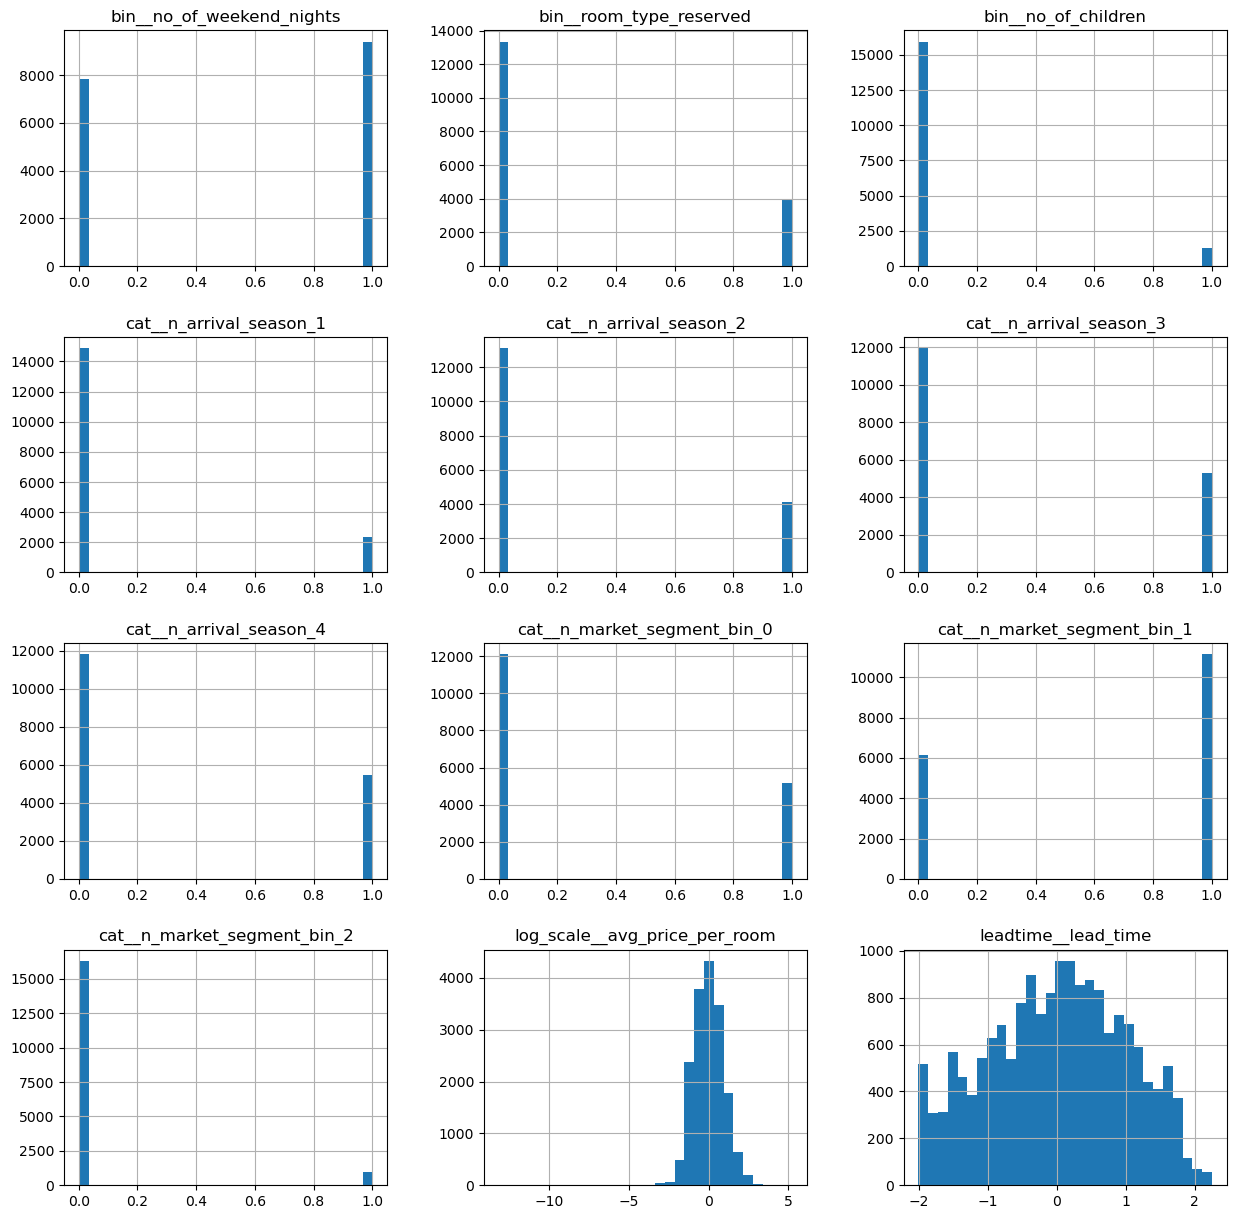

In [972]:
hoteldata_prepared.hist(bins=30, figsize=(15,15))
plt.show()

In [973]:
from sklearn.model_selection import train_test_split


# Features = alles außer der Zielspalte
X = hoteldata_prepared.copy()
y = df["booking_status"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [974]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Modell aufsetzen
forest_clf = RandomForestClassifier(
    n_estimators=200,    # Anzahl Bäume
    max_depth=None,      # oder z.B. 10 begrenzen
    random_state=42,
    n_jobs=-1            # alle Kerne nutzen
)

# Training
forest_clf.fit(X_train, y_train)



from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 1. Cross-Validation (nur auf Training!)
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict")
y_train_proba = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]

print("Cross-Val auf Trainingdaten rf nicht optimiert")
print(classification_report(y_train, y_train_pred))
print("ROC-AUC (train):", roc_auc_score(y_train, y_train_proba))


cm = confusion_matrix(y_train, y_train_pred)
print(cm)

Cross-Val auf Trainingdaten rf nicht optimiert
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      9091
           1       0.72      0.65      0.68      4724

    accuracy                           0.79     13815
   macro avg       0.77      0.76      0.77     13815
weighted avg       0.79      0.79      0.79     13815

ROC-AUC (train): 0.8611678129620057
[[7902 1189]
 [1654 3070]]


In [975]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "class_weight": [None, "balanced", "balanced_subsample"]
}


gridf_prec = GridSearchCV(
    estimator=forest_clf,
    param_grid=param_grid,
    cv=5,
    scoring="precision",   # hier Fokus auf Precision
    n_jobs=-1,
    #verbose=2
)

gridf_prec.fit(X_train, y_train)

print("Beste Parameter:", gridf_prec.best_params_)
print("CV beste Precision:", gridf_prec.best_score_)


Beste Parameter: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
CV beste Precision: 0.8578918573741625


In [976]:
forest_clf = RandomForestClassifier(
    n_estimators      = gridf_prec.best_params_.get("n_estimators"),
    max_depth         = gridf_prec.best_params_.get("max_depth"),
    min_samples_split = gridf_prec.best_params_.get("min_samples_split"),
    min_samples_leaf  = gridf_prec.best_params_.get("min_samples_leaf"),
    class_weight      = gridf_prec.best_params_.get("class_weight"),
    random_state=42,
    n_jobs=-1
)


# Training
forest_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [977]:
# 1. Cross-Validation (nur auf Training!)
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict")
y_train_proba = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]

print("Cross-Val auf Trainingdaten rf optimiert auf precision")
print(classification_report(y_train, y_train_pred))
print("ROC-AUC (train):", roc_auc_score(y_train, y_train_proba))

cm = confusion_matrix(y_train, y_train_pred)
print(cm)

Cross-Val auf Trainingdaten rf optimiert auf precision
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      9091
           1       0.85      0.49      0.62      4724

    accuracy                           0.80     13815
   macro avg       0.82      0.72      0.74     13815
weighted avg       0.81      0.80      0.78     13815

ROC-AUC (train): 0.860220562696998
[[8678  413]
 [2408 2316]]


In [978]:
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "class_weight": [None, "balanced", "balanced_subsample"]
}


gridf_recall = GridSearchCV(
    estimator=forest_clf,
    param_grid=param_grid,
    cv=5,
    scoring="recall",   # hier Fokus auf recall
    n_jobs=-1,
    #verbose=2
)

gridf_recall.fit(X_train, y_train)

print("Beste Parameter:", gridf_recall.best_params_)
print("CV beste Recall:", gridf_recall.best_score_)


Beste Parameter: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
CV beste Recall: 0.7343408662900188


In [979]:

forest_clf = RandomForestClassifier(
    n_estimators      = gridf_recall.best_params_.get("n_estimators", 200),
    max_depth         = gridf_recall.best_params_.get("max_depth", None),
    min_samples_split = gridf_recall.best_params_.get("min_samples_split", 2),
    min_samples_leaf  = gridf_recall.best_params_.get("min_samples_leaf", 1),
    class_weight      = gridf_recall.best_params_.get("class_weight", None),
    random_state=42,
    n_jobs=-1
)


# Training
forest_clf.fit(X_train, y_train)

# 1. Cross-Validation (nur auf Training!)
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict")
y_train_proba = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]

print("Cross-Val auf Trainingdaten optimiert auf recall")
print(classification_report(y_train, y_train_pred))
print("ROC-AUC (train):", roc_auc_score(y_train, y_train_proba))

cm = confusion_matrix(y_train, y_train_pred)
print(cm)

Cross-Val auf Trainingdaten optimiert auf recall
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      9091
           1       0.65      0.73      0.68      4724

    accuracy                           0.77     13815
   macro avg       0.75      0.76      0.75     13815
weighted avg       0.78      0.77      0.77     13815

ROC-AUC (train): 0.8606876272473515
[[7195 1896]
 [1277 3447]]


In [980]:
from sklearn.linear_model import LogisticRegression

# Modell aufsetzen (l2-Regularisierung, Solver 'liblinear' oder 'lbfgs')
log_clf = LogisticRegression(
    penalty="l2",
    solver="liblinear",   # für kleinere Datensätze stabil
    random_state=42,
    max_iter=1000
)

# Trainieren
log_clf.fit(X_train, y_train)

# 1. Cross-Validation (nur auf Training!)
y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=3, method="predict")
y_train_proba = cross_val_predict(log_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]

print("Cross-Val auf Trainingdaten lr nicht optimiert")
print(classification_report(y_train, y_train_pred))
print("ROC-AUC (train):", roc_auc_score(y_train, y_train_proba))


cm = confusion_matrix(y_train, y_train_pred)
print(cm)


Cross-Val auf Trainingdaten lr nicht optimiert
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      9091
           1       0.65      0.53      0.58      4724

    accuracy                           0.74     13815
   macro avg       0.71      0.69      0.70     13815
weighted avg       0.73      0.74      0.74     13815

ROC-AUC (train): 0.7840342161777365
[[7761 1330]
 [2225 2499]]


In [981]:
from sklearn.model_selection import StratifiedKFold

# Basismodell
log_clf = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter-Raster
param_grid_log = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],          # Regularisierungsstärke
    "solver": ["liblinear", "saga"],       # beide unterstützen l1
    "class_weight": [None, "balanced"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch mit Precision als Ziel
grid_prec = GridSearchCV(
    estimator=log_clf,
    param_grid=param_grid_log,
    cv=cv,
    scoring="precision",
    n_jobs=-1,
    verbose=1
)

grid_prec.fit(X_train, y_train)

print("Beste Parameter (Precision):", grid_prec.best_params_)
print("CV beste Precision:", round(grid_prec.best_score_, 3))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Beste Parameter (Precision): {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
CV beste Precision: 0.676


In [982]:
log_clf = LogisticRegression(
    penalty      = grid_prec.best_params_["penalty"],
    C            = grid_prec.best_params_["C"],
    solver       = grid_prec.best_params_["solver"],
    class_weight = grid_prec.best_params_["class_weight"],
    random_state = 42,
    max_iter     = 1000
)

# Trainieren
log_clf.fit(X_train, y_train)

# 1. Cross-Validation (nur auf Training!)
y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=3, method="predict")
y_train_proba = cross_val_predict(log_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]

print("Cross-Val auf Trainingdaten optimiert auf precision")
print(classification_report(y_train, y_train_pred))
print("ROC-AUC (train):", roc_auc_score(y_train, y_train_proba))


cm = confusion_matrix(y_train, y_train_pred)
print(cm)



Cross-Val auf Trainingdaten optimiert auf precision
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      9091
           1       0.68      0.50      0.58      4724

    accuracy                           0.75     13815
   macro avg       0.73      0.69      0.70     13815
weighted avg       0.74      0.75      0.74     13815

ROC-AUC (train): 0.7775847855407982
[[7975 1116]
 [2360 2364]]


In [983]:
# GridSearch mit Recall als Ziel
grid_rec = GridSearchCV(
    estimator=log_clf,
    param_grid=param_grid_log,
    cv=cv,
    scoring="recall",
    n_jobs=-1,
    verbose=1
)

grid_rec.fit(X_train, y_train)

print("Beste Parameter (Recall):", grid_rec.best_params_)
print("CV bester Recall:", round(grid_rec.best_score_, 3))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Beste Parameter (Recall): {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
CV bester Recall: 0.724


In [984]:
log_clf = LogisticRegression(
    penalty      = grid_rec.best_params_["penalty"],
    C            = grid_rec.best_params_["C"],
    solver       = grid_rec.best_params_["solver"],
    class_weight = grid_rec.best_params_["class_weight"],
    random_state = 42,
    max_iter     = 1000
)

# Trainieren
log_clf.fit(X_train, y_train)

# 1. Cross-Validation (nur auf Training!)
y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=3, method="predict")
y_train_proba = cross_val_predict(log_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]

print("Cross-Val auf Trainingdaten optimiert auf recall")
print(classification_report(y_train, y_train_pred))
print("ROC-AUC (train):", roc_auc_score(y_train, y_train_proba))

cm = confusion_matrix(y_train, y_train_pred)
print(cm)


Cross-Val auf Trainingdaten optimiert auf recall
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      9091
           1       0.54      0.72      0.62      4724

    accuracy                           0.69     13815
   macro avg       0.68      0.70      0.68     13815
weighted avg       0.73      0.69      0.70     13815

ROC-AUC (train): 0.7835991337377058
[[6122 2969]
 [1305 3419]]


In [985]:

# Random Forest – best params aus deinem RF-Grid (ohne Pipeline)
rf_best = RandomForestClassifier(
    n_estimators      = gridf_prec.best_params_["n_estimators"],
    max_depth         = gridf_prec.best_params_["max_depth"],
    min_samples_split = gridf_prec.best_params_["min_samples_split"],
    min_samples_leaf  = gridf_prec.best_params_["min_samples_leaf"],
    class_weight      = gridf_prec.best_params_["class_weight"],
    random_state=42,
    n_jobs=-1
)

# Logistic Regression – nimm z.B. die PRECISION-optimierten Params
lr_best_prec = LogisticRegression(
    penalty      = grid_prec.best_params_["penalty"],
    C            = grid_prec.best_params_["C"],
    solver       = grid_prec.best_params_["solver"],
    class_weight = grid_prec.best_params_["class_weight"],
    random_state = 42,
    max_iter     = 1000
)

# (Optional) die RECALL-optimierte LogReg
# lr_best_rec = LogisticRegression(
#     penalty      = grid_rec.best_params_["penalty"],
#     C            = grid_rec.best_params_["C"],
#     solver       = grid_rec.best_params_["solver"],
#     class_weight = grid_rec.best_params_["class_weight"],
#     random_state = 42,
#     max_iter     = 1000
# )


In [986]:
# Gleichgewichtete Wahrscheinlichkeiten; du kannst weights anpassen (z.B. RF etwas höher)
from sklearn.ensemble import VotingClassifier


vclf = VotingClassifier(
    estimators=[("rf", rf_best), ("lr", lr_best_prec)],
    voting="soft",
    weights=[1, 1],   # z.B. [2,1], wenn RF mehr Gewicht bekommen soll
    n_jobs=-1
)

vclf.fit(X_train, y_train)


# 1. Cross-Validation (nur auf Training!)
y_train_pred = cross_val_predict(vclf, X_train, y_train, cv=3, method="predict")
y_train_proba = cross_val_predict(vclf, X_train, y_train, cv=3, method="predict_proba")[:, 1]

print("Cross-Val auf Trainingdaten ensamble soft rf lr optimiert auf precision")
print(classification_report(y_train, y_train_pred))
print("ROC-AUC (train):", roc_auc_score(y_train, y_train_proba))

cm = confusion_matrix(y_train, y_train_pred)
print(cm)


Cross-Val auf Trainingdaten ensamble soft rf lr optimiert auf precision
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      9091
           1       0.82      0.48      0.60      4724

    accuracy                           0.79     13815
   macro avg       0.80      0.71      0.73     13815
weighted avg       0.79      0.79      0.77     13815

ROC-AUC (train): 0.8390929268099359
[[8586  505]
 [2457 2267]]
